In [2]:
import main
import lasio
model_path = "..\\tasks\\task 6\\Data\\modelling\\"

#l = lasio.read(model_path + '105.las')
#print(l.curves.keys())
main.create_csv_from_las_modeling(model_path,'modeling_aps.csv')

las_files: <filter object at 0x00000011A2B80F60>
las_dir: ..\tasks\task 6\Data\modelling\
Convert 100.las
['DEPT:1', 'DEPT:2', 'aps:1', 'rp', 'kp', 'kgl:1', 'kpr', 'kvo', 'kng', 'lit', 'satur', 'kgl:2', 'aps:2']
Convert 101.las
['DEPT:1', 'DEPT:2', 'aps:1', 'rp', 'kp', 'kgl:1', 'kpr', 'kvo', 'kng', 'lit', 'satur', 'kgl:2', 'aps:2']
Convert 102.las
['DEPT:1', 'DEPT:2', 'aps', 'rp', 'kp', 'kgl', 'kpr', 'kvo', 'kng', 'lit', 'satur']
Convert 103.las
['DEPT:1', 'DEPT:2', 'aps', 'rp', 'kp', 'kgl', 'kpr', 'kvo', 'kng', 'lit', 'satur']
Convert 103st2.las
['DEPT:1', 'DEPT:2', 'aps', 'rp', 'kp', 'kgl', 'kpr', 'kvo', 'kng', 'lit', 'satur']
Convert 104.las
['DEPT:1', 'DEPT:2', 'aps:1', 'rp', 'kp', 'kgl:1', 'kpr', 'kvo', 'kng', 'lit', 'satur', 'kgl:2', 'aps:2']
Convert 105.las
['DEPT:1', 'DEPT:2', 'aps:1', 'rp', 'kp', 'kgl:1', 'kpr', 'kvo', 'kng', 'lit', 'satur', 'kgl:2', 'aps:2']
Convert 106.las
['DEPT:1', 'DEPT:2', 'aps', 'rp', 'kp', 'kgl', 'kpr', 'kvo', 'kng', 'lit', 'satur']
Convert 107.las
['D

In [29]:
import numpy as np
import pandas as pd
las_data = pd.read_csv(main.data_dir + '\\modeling_aps.csv' , delimiter=';')
las_data = las_data.rename(columns={'well_name': 'WELL_NAME_UWI'})
las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')

In [30]:
key_data = pd.read_csv(main.data_dir + '\\well_name_key.csv' , delimiter=';')
key_data = key_data.rename(columns={'well_name_uwi': 'WELL_NAME_UWI'})
key_data = key_data.rename(columns={'well_name': 'WELL_NAME'})
key_data.replace('314_', '', regex=True, inplace=True)
key_data.head()

,WELL_NAME,WELL_NAME_UWI
0,224st4,103ST2
1,238st4,117ST2
2,274st4,153ST2
3,300,198
4,301,199


In [31]:
las_data = pd.merge(las_data, key_data, on='WELL_NAME_UWI')

In [33]:
las_data.head()

,WELL_NAME_UWI,DEPT,APS,WELL_NAME
0,100,2563.0,NaN,312
1,100,2563.1,NaN,312
2,100,2563.2,NaN,312
3,100,2563.3,NaN,312
4,100,2563.4,NaN,312


In [34]:
real_top = pd.read_csv('real_data_test\\top_df.csv', delimiter=';')
real_top = real_top.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_top['X']
del real_top['Y']
real_top.head(n=2)

,WELL_NAME_UWI,DEPTH_TOP
0,100,2548.81
1,101,2556.23


In [35]:
real_bottom = pd.read_csv('real_data_test\\bottom_df.csv', delimiter=';')
real_bottom = real_bottom.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_bottom['X']
del real_bottom['Y']
real_bottom.head(n=2)

,WELL_NAME_UWI,DEPTH_BOTTOM
0,100,2564.81
1,101,2571.71


In [36]:
# данные от организаторов
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'WC'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
del water_content_data['date_start']
water_content_data = water_content_data.rename(columns={'well_name': 'WELL_NAME'})
water_content_data.head(n=5)

,WELL_NAME,WC
0,380,0.49
1,379,0.30
2,370,0.13
3,417,0.08
4,389,0.22


In [37]:
# данные посчитанные на карте
wc_calc_data = pd.read_csv('fake_data\\map_wc_test_calc_res.csv', delimiter=';')
del wc_calc_data['Y']
del wc_calc_data['X']
wc_calc_data['WELL_NAME'] = wc_calc_data['WELL_NAME'].astype('str')
wc_calc_data = wc_calc_data.drop(wc_calc_data[wc_calc_data['WC'] > 1].index)
wc_calc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 166
Data columns (total 2 columns):
WELL_NAME    165 non-null object
WC           165 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [38]:
print(len(las_data['WELL_NAME'].value_counts()))
print(len(real_bottom['WELL_NAME_UWI'].value_counts()))
print(len(real_top['WELL_NAME_UWI'].value_counts()))
print(len(water_content_data['WELL_NAME'].value_counts()))
print(len(wc_calc_data['WELL_NAME'].value_counts()))

164
230
230
180
164


In [39]:
#real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
real_data = pd.merge(wc_calc_data, las_data, on='WELL_NAME')
real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI') 
real_data.head()

,WELL_NAME,WC,WELL_NAME_UWI,DEPT,APS,DEPTH_TOP,DEPTH_BOTTOM
0,380,0.392981,178,2593.0,NaN,2560.32,2586.48
1,380,0.392981,178,2593.1,NaN,2560.32,2586.48
2,380,0.392981,178,2593.2,NaN,2560.32,2586.48
3,380,0.392981,178,2593.3,NaN,2560.32,2586.48
4,380,0.392981,178,2593.4,NaN,2560.32,2586.48


In [40]:
real_data_na = real_data.dropna()
print(len(real_data['WELL_NAME'].value_counts()))
real_data.info()

161
<class 'pandas.core.frame.DataFrame'>
Int64Index: 331962 entries, 0 to 331961
Data columns (total 7 columns):
WELL_NAME        331962 non-null object
WC               331962 non-null float64
WELL_NAME_UWI    331962 non-null object
DEPT             331962 non-null float64
APS              32053 non-null float64
DEPTH_TOP        331962 non-null float64
DEPTH_BOTTOM     331962 non-null float64
dtypes: float64(5), object(2)
memory usage: 20.3+ MB


In [41]:
import lasio
import re
def load_and_convert_to_interp(dev_path, well_name):
    f = open(dev_path + well_name + '.dev', 'r')
    well_num = 0
    md = []
    abs = []
    for line in f.readlines():
        if well_num > 16:
            # list = line.split(' ')
            # print(list)
            numbers = re.findall(r'[-]?[0-9]+.[0-9]+', line)
            md.append(float(numbers[0]))
            abs.append(float(numbers[3]))
        well_num = well_num +1
    f.close()
    f_spline = interpolate.interp1d(abs, md, kind = 'slinear', bounds_error=False)
    return f_spline

In [45]:
from scipy import interpolate
dev_path = "..\\tasks\\task 6\\data\\dev\\"
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
well_name = well_name_list[1]
f_spline = load_and_convert_to_interp(dev_path, well_name)
print(f_spline(0))
print(well_name)

113.72000000000003
360


In [49]:
real_data_na = real_data_na.rename(columns={'DEPT': 'DEPTH'})

In [50]:
from scipy import interpolate
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
x_values = []
y_values = []
count_val = 100
well_count = 0
for well_name in well_name_list:
    if well_count%20 == 0:
        print(well_count, ' of ', len(well_name_list))
    data_well =  real_data_na[real_data_na['WELL_NAME_UWI'] == well_name]
    f_spline = load_and_convert_to_interp(dev_path, well_name)
    bottom = f_spline(data_well['DEPTH_BOTTOM'].tolist()[0])
    top = f_spline(data_well['DEPTH_TOP'].tolist()[0])
    data_well_by_bound = data_well[(data_well['DEPTH'] >= top) & (data_well['DEPTH'] <= bottom)]
    x_arr = data_well_by_bound['DEPTH']
    y_arr = data_well_by_bound['APS']
    
    # print ('length of array depth', len(x_arr))
    # print(len(x_arr), len(y_arr))
    if len(x_arr) < 10:
        continue
    f_spline = interpolate.interp1d(x_arr, y_arr, kind = 'slinear')
    h_start = data_well_by_bound['DEPTH'].min()
    h_end = data_well_by_bound['DEPTH'].max()
    # print(h_start, h_end, top, bottom)
    h_step = (h_end - h_start)/count_val
    x_temp = []
    i = 0
    while(i < count_val):
        x_temp.append(float(f_spline(h_start + i * h_step)))
        i = i + 1
    x_values.append(x_temp)  
    y_values.append(data_well['WC'].tolist()[0])
    well_count = well_count + 1
print('end fill')

0  of  161
20  of  161
40  of  161
60  of  161
80  of  161
100  of  161
120  of  161
140  of  161
end fill


In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

In [52]:
import pickle
# Loading the saved decision tree model pickle
decision_tree_pkl_filename = 'fake_data\\decision_forest_grid_fake_data_regressor.pkl'
decision_tree_model_pkl_load = open(decision_tree_pkl_filename, 'rb')
decision_tree_model = pickle.load(decision_tree_model_pkl_load)
print("Loaded Decision tree model :: ", decision_tree_model)

Loaded Decision tree model ::  GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=17,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 10, 20, 40, 60], 'n_estimators': [1, 10, 30, 50, 100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)


D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Анализ реальных aps с аппроксимированными значениями wc


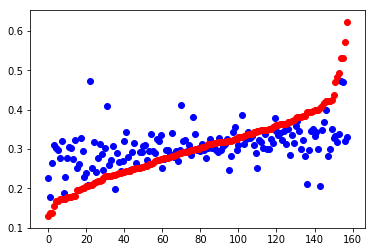

MSE                      = 0.00587992962558
MAE                      = 0.0554286708861
r2_score                 = 0.212359830406    (best_value is 1)
explained_variance_score = 0.214189108897    (best_value is 1)


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
y_pred = decision_tree_model.predict(x_values)
predict_for_analize_fake = pd.DataFrame({'y_hold':y_values, 'y_predict':y_pred})
# print('Анализ реальных aps с реальными значениями wc')
print('Анализ реальных aps с аппроксимированными значениями wc')
data_analize_func(predict_for_analize_fake)
